In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

odb_1 = scipy.io.loadmat('P1_odb_down.mat')
std_1 = scipy.io.loadmat('P1_std_down.mat')

odb_2 = scipy.io.loadmat('P2_odb_down.mat')
std_2 = scipy.io.loadmat('P2_std_down.mat')

odb_3 = scipy.io.loadmat('P3_odb_down.mat')
std_3 = scipy.io.loadmat('P3_std_down.mat')

odb_4 = scipy.io.loadmat('P4_odb_down.mat')
std_4 = scipy.io.loadmat('P4_std_down.mat')

odb_5 = scipy.io.loadmat('P5_odb_down.mat')
std_5 = scipy.io.loadmat('P5_std_down.mat')

In [2]:
X_std_1 = std_1['E_std_down']
X_odb_1 = odb_1['E_odb_down']

X_std_2 = std_2['E_std_down']
X_odb_2 = odb_2['E_odb_down']

X_std_3 = std_3['E_std_down']
X_odb_3 = odb_3['E_odb_down']

X_std_4 = std_4['E_std_down']
X_odb_4 = odb_4['E_odb_down']

X_std_5 = std_5['E_std_down']
X_odb_5 = odb_5['E_odb_down']

In [3]:
data_std_1 = pd.DataFrame(X_std_1)
data_odb_1 = pd.DataFrame(X_odb_1)

data_std_2 = pd.DataFrame(X_std_2)
data_odb_2 = pd.DataFrame(X_odb_2)

data_std_3 = pd.DataFrame(X_std_3)
data_odb_3 = pd.DataFrame(X_odb_3)

data_std_4 = pd.DataFrame(X_std_4)
data_odb_4 = pd.DataFrame(X_odb_4)

data_std_5 = pd.DataFrame(X_std_5)
data_odb_5 = pd.DataFrame(X_odb_5)

In [4]:
data_odb_1['y'] = np.ones((150))
data_std_1['y'] = np.ones((1050))*(-1)

data_odb_2['y'] = np.ones((150))
data_std_2['y'] = np.ones((1050))*(-1)

data_odb_3['y'] = np.ones((150))
data_std_3['y'] = np.ones((1050))*(-1)

data_odb_4['y'] = np.ones((150))
data_std_4['y'] = np.ones((1050))*(-1)

data_odb_5['y'] = np.ones((150))
data_std_5['y'] = np.ones((1050))*(-1)

In [5]:
data_1 = pd.concat([data_odb_1,data_std_1[:150]])

data_2 = pd.concat([data_odb_2,data_std_2[:150]])

data_3 = pd.concat([data_odb_3,data_std_3[:150]])

data_4 = pd.concat([data_odb_4,data_std_4[:150]])

data_5 = pd.concat([data_odb_5,data_std_5[:150]])

In [6]:
data_1 = data_1.sample(frac=1, random_state=0)

data_2 = data_2.sample(frac=1, random_state=0)

data_3 = data_3.sample(frac=1, random_state=0)

data_4 = data_4.sample(frac=1, random_state=0)

data_5 = data_5.sample(frac=1, random_state=0)

In [7]:
X_1 = data_1.loc[:, data_1.columns != 'y'].to_numpy()
y_1 = data_1['y'].to_numpy()

X_2 = data_2.loc[:, data_2.columns != 'y'].to_numpy()
y_2 = data_2['y'].to_numpy()

X_3 = data_3.loc[:, data_3.columns != 'y'].to_numpy()
y_3 = data_3['y'].to_numpy()

X_4 = data_4.loc[:, data_4.columns != 'y'].to_numpy()
y_4 = data_4['y'].to_numpy()

X_5 = data_5.loc[:, data_5.columns != 'y'].to_numpy()
y_5 = data_5['y'].to_numpy()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_1_std = scaler.fit_transform(X_1)

X_2_std = scaler.fit_transform(X_2)

X_3_std = scaler.fit_transform(X_3)

X_4_std = scaler.fit_transform(X_4)

X_5_std = scaler.fit_transform(X_5)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_std, y_1,
                                                            test_size=0.1, stratify=y_1, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_std, y_2,
                                                            test_size=0.1, stratify=y_2, random_state=42)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3_std, y_3,
                                                            test_size=0.1, stratify=y_3, random_state=42)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4_std, y_4,
                                                            test_size=0.1, stratify=y_4, random_state=42)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5_std, y_5,
                                                            test_size=0.1, stratify=y_5, random_state=42)

In [11]:
X_train = np.vstack((X_train_1,X_train_2,X_train_3,X_train_4,X_train_5))
y_train = np.hstack((y_train_1,y_train_2,y_train_3,y_train_4,y_train_5))

In [12]:
data = pd.DataFrame(X_train)
data['y'] = y_train
data.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,y
0,1.430836,1.078124,0.325472,-0.257132,-0.678663,-1.266310,-1.131225,-0.114271,1.526363,0.230417,...,-0.374042,0.428108,0.494919,0.541443,-0.625490,-0.046604,-0.005975,-0.648095,0.017793,1.0
1,0.404253,-0.664945,-0.812230,-0.418725,-0.436707,-0.200638,0.550109,1.609472,0.207669,0.784649,...,0.664110,-0.339470,0.733363,-1.184289,1.472521,0.987418,-0.499976,-0.385905,-0.487583,-1.0
2,-1.109324,-0.849852,0.445107,0.032421,-0.723345,0.960236,-0.041948,-0.699620,-0.792444,0.439816,...,-1.562043,0.268086,0.118605,0.439580,1.133079,0.712399,0.077000,-0.729052,-0.249662,-1.0
3,0.768406,0.479360,0.861883,0.779610,1.291613,0.045876,-0.150509,-0.158907,0.350779,-0.708267,...,0.387941,0.621212,-1.040548,-0.805404,-0.402308,-1.201806,0.863859,-0.239232,1.206397,1.0
4,0.387547,0.631630,0.273774,0.049799,-0.789375,0.273200,-0.081125,0.245377,0.484055,-0.470547,...,0.725006,1.245003,-0.203622,1.180171,-0.645822,0.564838,-0.317559,-0.571817,0.630544,1.0


In [13]:
data = data.sample(frac=1, random_state=0)

In [14]:
X_train = data.loc[:, data.columns != 'y'].to_numpy()
y_train = data['y'].to_numpy()

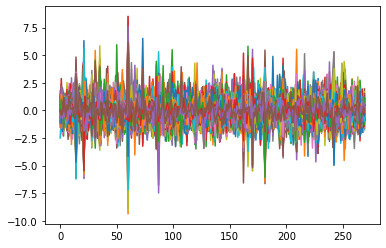

In [32]:
plt.plot(X_train)
plt.show()

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

oversample = SMOTE()
#oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [28]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

#clf = RandomForestClassifier(max_depth=100, random_state=0)
#clf = LinearDiscriminantAnalysis()
clf = svm.SVC(kernel='rbf')
clf = clf.fit(X_train, y_train)

In [29]:
for i in range(136):
    y_pred_1 = clf.predict(X_test_1[:i+1])

    report_1 = classification_report(y_test_1[:i+1], y_pred_1)  
    print(report_1)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

              precision    recall  f1-score   support

        -1.0       0.67      1.00      0.80         2
         1.0       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

              precision    recall  f1-score   support

        -1.0       0.75      1.00      0.86         3
         1.0      

/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/an

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              preci

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              precision    recall  f1-score   support

        -1.0       0.76      0.87      0.81        15
         1.0       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              preci

In [18]:
y_pred_2 = clf.predict(X_test_2)

report_2 = classification_report(y_test_2, y_pred_2)  
print(report_2)

              precision    recall  f1-score   support

        -1.0       0.80      0.80      0.80        15
         1.0       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [30]:
for i in range(136):
    y_pred_3 = clf.predict(X_test_3[:i+1])

    report_3 = classification_report(y_test_3[:i+1], y_pred_3)  
    print(report_3)

/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/flavio-141/anaconda3/

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       1.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       2.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         1.0       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

              preci

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              preci

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              precision    recall  f1-score   support

        -1.0       0.69      0.60      0.64        15
         1.0       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              preci

In [20]:
y_pred_4 = clf.predict(X_test_4)

report_4 = classification_report(y_test_4, y_pred_4)  
print(report_4)

              precision    recall  f1-score   support

        -1.0       0.67      0.80      0.73        15
         1.0       0.75      0.60      0.67        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30



In [21]:
y_pred_5 = clf.predict(X_test_5)

report_5 = classification_report(y_test_5, y_pred_5)  
print(report_5)

              precision    recall  f1-score   support

        -1.0       0.75      0.60      0.67        15
         1.0       0.67      0.80      0.73        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30



In [22]:
(93+87+83+83)/4

86.5